[Notebook](https://github.com/jmportilla/Udemy---Machine-Learning/blob/master/NLP%20(Natural%20Language%20Processing).ipynb)

In [3]:
import nltk

In [4]:
messages = [line.rstrip() for line in open('sms_spam_collection/SMSSpamCollection')]

In [5]:
print(len(messages))

5574


In [6]:
for num, message in enumerate(messages[:10]):
    print(num, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [7]:
import pandas

In [8]:
messages = pandas.read_csv('sms_spam_collection/SMSSpamCollection',sep='\t',names=['labels','message'])

In [9]:
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [13]:
# Feature engineering the 'length' column (Adding it as a new column)
messages['length'] = messages['message'].apply(len)
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

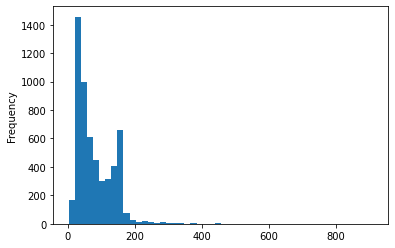

In [15]:
messages['length'].plot(bins=50,kind='hist') # we see here that the x-axis continue almost until 1000, there must be some very long message in this frame. Let's look for it

In [16]:
messages['length'].describe() # first let's use describe to find out the biggest message (max column)

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [17]:
messages[messages['length'] == 910]['message'].iloc[0] # we have seen that the max length is 910, so we can use that param to get the message itself

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

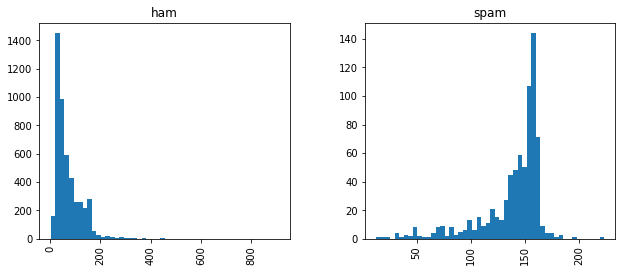

In [18]:
messages.hist(column='length',by='labels',bins=50,figsize=(10,4))

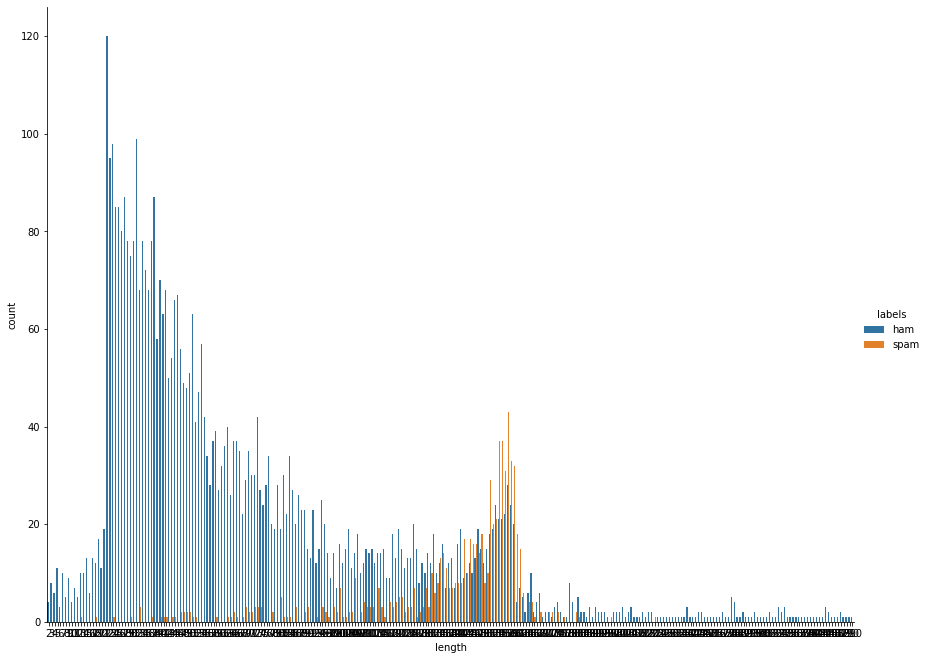

In [28]:
# Exercise: Use an hist to determine if the length of a message is related with the fact that the message is a spam or not
# x=span, y=ham, hue=length
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# In this graph we can see that there is a correlation between the length of the message, and the fact that the message is spam.
# When longer the message, the probability to be an span email increases exponentially.
sns.catplot(x='length',data=messages, hue='labels',kind='count', height=9.27, aspect=14.7/11.27)

## Part 3

In [29]:
import string

In [30]:
mess = 'Sample message! Notice: it has punctuation'

In [31]:
nopunc = [char for char in mess if char not in string.punctuation]

In [33]:
nopunc = ''.join(nopunc)

In [34]:
nopunc

'Sample message Notice it has punctuation'

In [35]:
from nltk.corpus import stopwords

In [36]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [37]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [38]:
clean_message = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [39]:
clean_message

['Sample', 'message', 'Notice', 'punctuation']

In [41]:
def text_process(mess):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    '''
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again from the string
    nopunc = ''.join(nopunc)

    # Now just remove the stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [42]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [43]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object


## Continuing Normalization

There are a lot of ways to continue normalizing this text. Such as [Stemming](https://en.wikipedia.org/wiki/Stemming) or distinguishing by [part of speech](http://www.nltk.org/book/ch05.html).

NLTK has lots of built-in tools and great documentation on a lot of these methods. Sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:

'Nah dawg, IDK! Wut time u headin to da club?'

versus

'No dog, I don't know! What time are you heading to the club?'

Some text normalization methods will have trouble with this type of shorthand and so I'll leave you to explore those more advanced methods through the [NLTK book online](http://www.nltk.org/book/).

For now we will just focus on using what we have to convert our list of words to an actual vector that SciKit-Learn can use.

## Part 4: Vectorization

Currently, we have the messages as lists of tokens (also known as [lemmas](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

Count how many times does a word occur in each message (Known as term frequency)

Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus. We will first use SciKit Learn's CountVectorizer. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message.

Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
bow_transformer = CountVectorizer(analyzer=text_process)

In [46]:
bow_transformer.fit(messages['message'])

CountVectorizer(analyzer=<function text_process at 0x00000214DC76C310>)

In [47]:
message4 = messages['message'][3]

In [48]:
print(message4)

U dun say so early hor... U c already then say...


In [49]:
bow4 = bow_transformer.transform([message4])

C:\Users\abelmescua\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [50]:
print(bow4) # worrds of the message4, and times that each of them appear in the message

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [56]:
print(bow_transformer.get_feature_names()[9554]) # you can look for the word also here

say


In [53]:
messages_bow = bow_transformer.transform(messages['message'])

C:\Users\abelmescua\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [57]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)
print('Sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
Sparsity: 0.08%
